In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=8c0e5f630a82bbd7bb65a8ea81645630e2800b668c4e6fde944d937da82493f4
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


# Data Cleaning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_20newsgroups

#Here we are fetching the raw data from the 20newsgroup corpora. If no params are given, default shuffle is True.
raw_dataset = fetch_20newsgroups()
#print(raw_dataset)
print(raw_dataset.data[0])

num_documents = len(raw_dataset.data)
num_categories = len(raw_dataset.target_names)

print(f"num_documents:{num_documents}")
print(f"num_categories:{num_categories}")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





num_documents:11314
num_categories:20


In [4]:
#Subset(all) includes all the training and test set data.
#Filtering out the content to analyze the document
# shuffle=False to load the data in the order rather than loading in random order
# loading only useful data and removing un-necessary header etc..
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])

corpus = dataset.data
gnd_labels = dataset.target #Ground truth labels
print(len(corpus), len(gnd_labels))
print(type(corpus), type(gnd_labels))
print(gnd_labels)
print(dataset.target_names)



morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
18846 18846
<class 'list'> <class 'numpy.ndarray'>
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


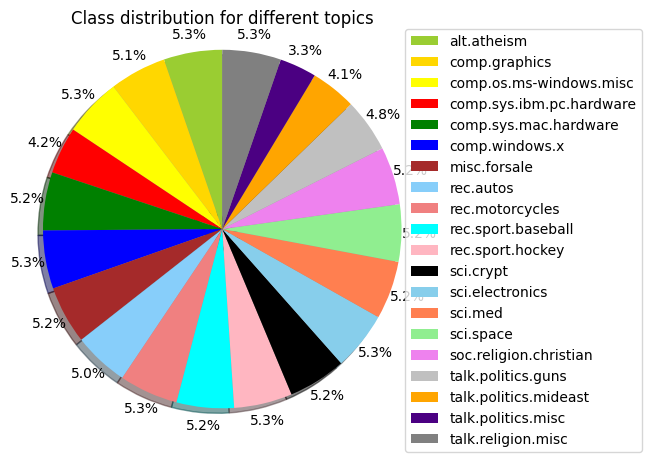

In [5]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
# Counter(labels)
label_20, values = zip(*Counter(gnd_labels).items())
indexes = np.arange(len(label_20))

# plot the labels
label_20 = dataset.target_names
val = values
colors = ['yellowgreen', 'gold', 'yellow', 'red', 'green', 'blue', 'brown', 'lightskyblue', 'lightcoral','cyan','lightpink','black', 'skyblue', 'coral','lightgreen', 'violet', 'silver', 'orange', 'indigo', 'gray']
patches, texts, autotexts = plt.pie(val, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2, autopct='%1.1f%%')

plt.legend(patches, label_20, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.axis('equal')
plt.tight_layout()
plt.title('Class distribution for different topics')

# Displaying numbers on pie chart slices
for autotext in autotexts:
    autotext.set_color('black')

plt.show()

In [6]:
# First 2 documents
for i in range(2):
    doc = corpus[i]
    category = dataset.target_names[gnd_labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")


The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

# Tokenization

In [7]:
# perform more Pre-processing steps
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    en_stop = get_stop_words('en')
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in en_stop]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        yield doc

# Build Vocabulary

In [8]:
# Preprocess all the documents in the corpus
Vocab_v1 = list(pre_processing(corpus))

# verify length of the clean corpus and print a sample clean tokenized document
print(len(Vocab_v1))
print(Vocab_v1[0])


18846
['morgan', 'guzman', 'will', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'will', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', 'stud', 'pitcher']


# Training Doc2Vec

Training model...
Total time: 228.82557439804077 secs
18846
                                          Cluster #0  \
1  dj popular player san diego derek bell faring ...   
2  well 27 outs row hits walks really retired 26 ...   
3  gee never knew valentine made comment viola si...   
4  yeah valentine many rings clemens nothin like ...   
5  philly fan penna baseball fan anxious see penn...   

                                          Cluster #1  \
1  try one size rather post name email tell enjoy...   
2  cut part 02 03 m_xn gghol 3iz 02'c ym wt v8a c...   
3  cut part 01 01 begin 644 1260wn31 exe m35ko 1d...   
4  cut part 03 03 m2c3 jsg j7lus 30xc 16 dk f6 3q...   
5  part xrastool cut p'r8g kw'aqy qjzjh 1wbb 022 ...   

                                          Cluster #2  \
1  part 14 m0 cxt 27m cbn c24e cx rbn hkc goc mbc...   
2  part 14 3dy 3dy 3dy 3dy 3dy 3dy 3dy ij fij 3dy...   
3  due resolution size 14 parts uuencoded bitmap ...   
4  part 14 nb8 nahfnajz ahf ajz ah b9r khf

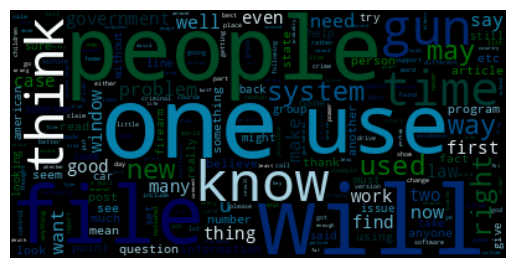

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.neighbors import KDTree
from itertools import cycle
from wordcloud import WordCloud
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Train the Doc2Vec model on the cleaned sentences
start = time.time()

# Set values for various parameters
num_features = 100  # Dimensionality of the hidden layer representation
min_word_count = 20  # Minimum word count to keep a word in the vocabulary
context = 5  # Context window size (on each side)
downsampling = 1e-3  # Downsample setting for frequent words

# Convert documents into TaggedDocument format required by Doc2Vec
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(Vocab_v1)]

# Initialize and train the Doc2Vec model
print("Training model...")
doc2vec_model = Doc2Vec(tagged_data, vector_size=num_features, window=context, min_count=min_word_count, workers=4, epochs=20)

# Infer document vectors
doc_vectors = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data]

print('Total time: ' + str((time.time() - start)) + ' secs')

# Print length of word vectors
print(len(doc_vectors))

# Implementing K-centers clustering
def k_centers(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in centers) for x in X])
        new_center = X[np.argmax(distances)]
        centers.append(new_center)
    return np.array(centers)

num_clusters = 20  # 20 topics
centers = k_centers(doc_vectors, num_clusters)

# Assigning each point to the nearest center
clusters = np.argmin([[np.linalg.norm(x - center) for center in centers] for x in doc_vectors], axis=1)
centroid_map = dict(zip(range(len(Vocab_v1)), clusters))

# Get words in each cluster that are closest to the cluster center
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]
    closest_words = {}
    for i in range(len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    # Convert lists to strings in the DataFrame
    df = pd.DataFrame(closest_words).applymap(lambda x: ' '.join(x))
    df.index = df.index + 1
    return df

# Get the top words and print the first 5 clusters
top_words = get_top_words(Vocab_v1, 5000, centers, doc_vectors)
print(top_words.head())

# Create a word cloud with the words of a cluster and print and save them
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap)
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

# Call on each cluster, and pass in a different color scheme in each iteration to distinguish them
cmaps = cycle([
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
    'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])

for i in range(num_clusters):
    col = next(cmaps)
    display_cloud(i, col)

Silhouette Score for k=15: 0.746670663356781
Silhouette Score for k=16: 0.746658444404602
Silhouette Score for k=17: 0.7466773986816406
Silhouette Score for k=18: 0.7465131878852844
Silhouette Score for k=19: 0.7464767694473267
Silhouette Score for k=20: 0.746397078037262
Silhouette Score for k=21: 0.7370755672454834
Silhouette Score for k=22: 0.7395157814025879
Silhouette Score for k=23: 0.7331713438034058
Silhouette Score for k=24: 0.7333605885505676


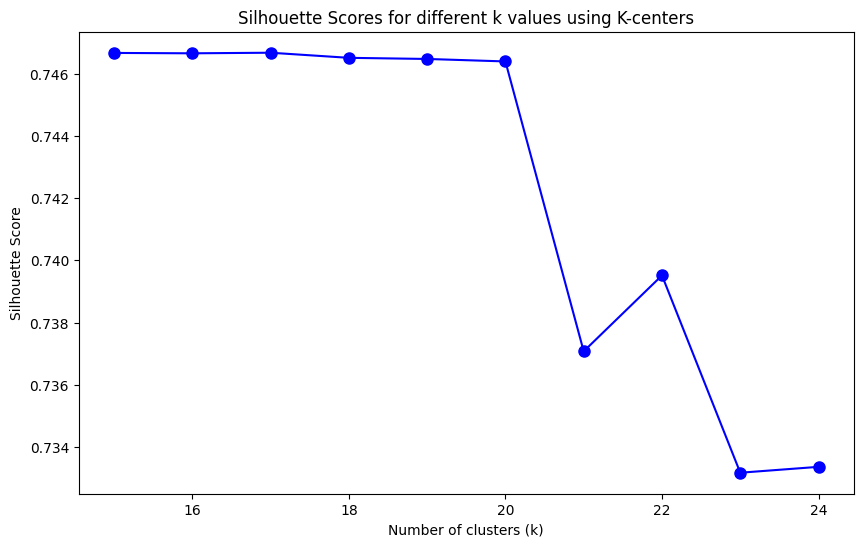

In [12]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def k_centers(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in centers) for x in X])
        new_center = X[np.argmax(distances)]
        centers.append(new_center)
    return np.array(centers)

def assign_clusters(X, centers):
    return np.argmin([[np.linalg.norm(x - center) for center in centers] for x in X], axis=1)

# Calculate silhouette scores for k values around the suspected optimal number
k_values = range(15, 25)
silhouette_scores = []

for k in k_values:
    centers = k_centers(doc_vectors, k)
    clusters = assign_clusters(doc_vectors, centers)
    silhouette_avg = silhouette_score(doc_vectors, clusters)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k values using K-centers')
plt.show()


NMI Score for k=15: 0.00485127385484272
NMI Score for k=16: 0.00485097657511476
NMI Score for k=17: 0.005342888276795687
NMI Score for k=18: 0.00517514220640746
NMI Score for k=19: 0.005280734608683428
NMI Score for k=20: 0.005958739010051726
NMI Score for k=21: 0.0060640927156829375
NMI Score for k=22: 0.006576914447993376
NMI Score for k=23: 0.007090035790805184
NMI Score for k=24: 0.007293820154793866


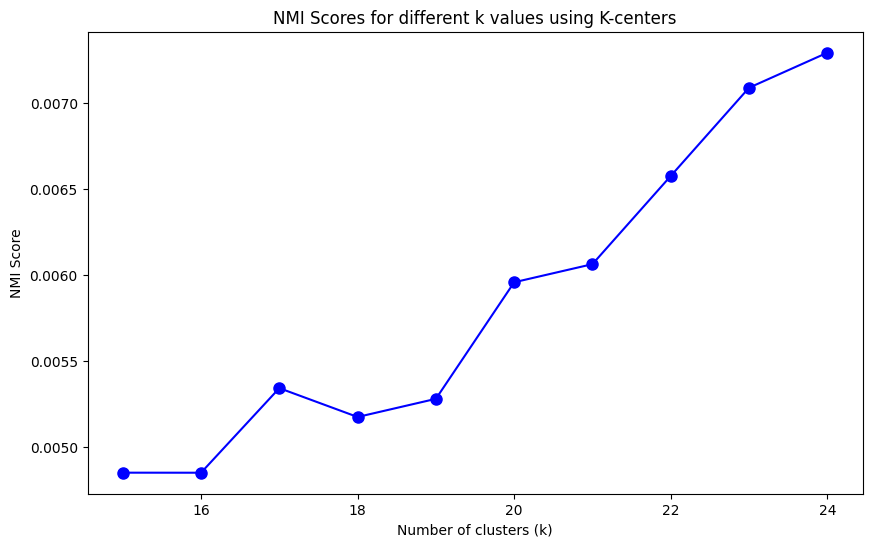

In [15]:
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import numpy as np


def k_centers(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    for _ in range(1, k):
        distances = np.array([min(np.linalg.norm(x - c) for c in centers) for x in X])
        new_center = X[np.argmax(distances)]
        centers.append(new_center)
    return np.array(centers)

def assign_clusters(X, centers):
    return np.argmin([[np.linalg.norm(x - center) for center in centers] for x in X], axis=1)

# Calculate NMI scores for k values around the suspected optimal number
k_values = range(15, 25)
nmi_scores = []

for k in k_values:
    centers = k_centers(doc_vectors, k)
    clusters = assign_clusters(doc_vectors, centers)
    nmi_score = normalized_mutual_info_score(gnd_labels, clusters)
    nmi_scores.append(nmi_score)
    print(f"NMI Score for k={k}: {nmi_score}")

# Plot NMI scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, nmi_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('NMI Score')
plt.title('NMI Scores for different k values using K-centers')
plt.show()
